In [27]:
from sklearn.datasets import fetch_california_housing

In [28]:
import pandas as pd

In [29]:
boston = fetch_california_housing()
X =pd.DataFrame(boston.data)
Y=pd.DataFrame(boston.target)

In [30]:
X.columns=boston.feature_names

In [31]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [32]:
import numpy as np

In [33]:
u=X.mean()

In [34]:
print(u)

MedInc           3.870671
HouseAge        28.639486
AveRooms         5.429000
AveBedrms        1.096675
Population    1425.476744
AveOccup         3.070655
Latitude        35.631861
Longitude     -119.569704
dtype: float64


In [35]:
std=X.std()

In [36]:
X=(X-u)/std

In [37]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.344709,0.982119,0.628544,-0.153754,-0.974405,-0.049595,1.052523,-1.327803
1,2.332181,-0.607004,0.327033,-0.263329,0.861418,-0.092510,1.043159,-1.322812
2,1.782656,1.856137,1.155592,-0.049015,-0.820757,-0.025842,1.038478,-1.332794
3,0.932945,1.856137,0.156962,-0.049832,-0.766010,-0.050328,1.038478,-1.337785
4,-0.012881,1.856137,0.344702,-0.032905,-0.759828,-0.085614,1.038478,-1.337785


In [38]:
import matplotlib.pyplot as plt

In [40]:
X.shape

(20640, 8)

In [42]:
Y.shape

(20640, 1)

In [135]:
X=boston.data
Y=boston.target

In [136]:
Y.shape

(20640,)

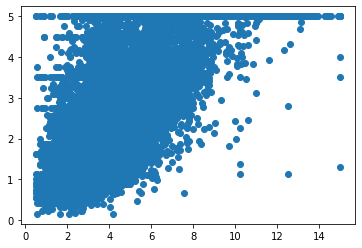

In [137]:
plt.scatter(X[:,0],Y)

In [138]:
a=np.ones((X.shape[0],1))

In [139]:
X=np.hstack((a,X))

In [140]:
X.T.shape

(9, 20640)

In [141]:
def hypothesis(X,theta):
    return np.dot(X,theta)

In [142]:
def error(y_,Y):
    return sum((Y-y_)**2)

In [143]:
def gradient(X,Y,theta):
    y_=hypothesis(X,theta)
    #return np.sum((y_-Y)*X,axis=1)
    return np.dot(X.T,y_-Y)

In [153]:
def gd(X,Y,lr=0.1,m_i=300):
    error_list=[]
    theta=np.zeros((X.shape[1],))
    for i in range(m_i):
        error_list.append(error(hypothesis(X,theta),Y))
        grad=gradient(X,Y,theta)
        theta=theta-lr*grad
    return error_list,theta

In [154]:
error_list,theta=gd(X,Y)

C:\Users\taran\AppData\Local\Temp/ipykernel_13564/4154987876.py:2: RuntimeWarning: overflow encountered in square
  return sum((Y-y_)**2)
C:\Users\taran\AppData\Local\Temp/ipykernel_13564/1459521218.py:7: RuntimeWarning: invalid value encountered in subtract
  theta=theta-lr*grad


In [155]:
theta=np.zeros((X.shape[1],))
y_=hypothesis(X,theta)
(y_-Y).shape
#np.dot(X,y_-Y).shape

(20640,)

In [156]:
error(hypothesis(X,theta),Y)

115800.37322709909

In [157]:
print(error_list)

[115800.37322709909, 2.503675963573457e+24, 1.178727858460123e+44, 5.549451756423065e+63, 2.612682357181144e+83, 1.2300510751579754e+103, 5.791081504181563e+122, 2.7264416629013744e+142, 1.283608965930976e+162, 6.043232099325419e+181, 2.845154184462204e+201, 1.339498831141433e+221, 6.306361632096969e+240, 2.969035590788496e+260, 1.3978222077374873e+280, 6.580948138534095e+299, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 

In [149]:
error_list=np.array(error_list)

In [150]:
error_list.shape

(300,)

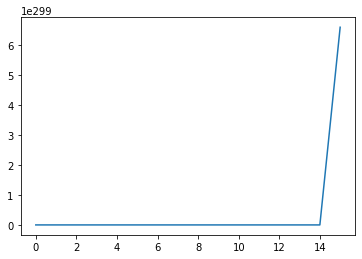

In [152]:
plt.plot(error_list)
plt.show()